In [1]:
import numpy as np
import numpy.linalg as npl
import math
import matplotlib.pyplot as plt
from scipy.integrate import odeint

**Worked Example**
Read Calculus in Context, Chapter 4. This explores additional models that can be explored using this method. 
Copy and paste SIR plot here and  modify to model the Lotka-Voerra Model from page 193 number 7. Explore some of the questions a - f on your own and add some short notes about this model. note: The scaling factor for lynx is 60 (page 194, part c)."plot H and 60L"




Text(0.5, 1.0, 'Hare and Lynx Populations')

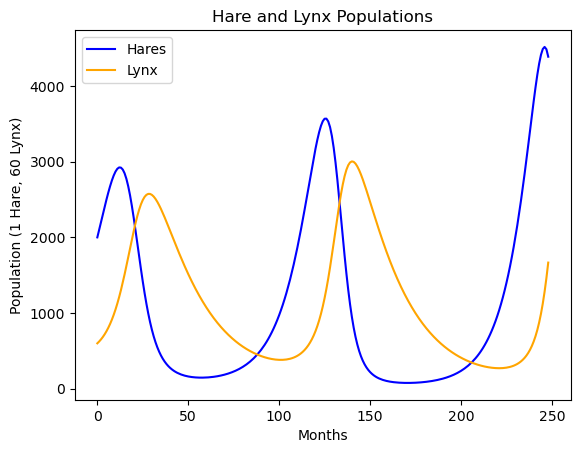

In [2]:
def lynxHare(num_hare, num_lynx, t_final):
    # time variables
    t_initial = 0
    t = t_initial
    # Starting values at the beginning of model for hares and lynx (turns out the plural of lynx is just lynx)
    H = num_hare
    L = num_lynx

    # Hares per month per hare
    a = .1
    # Hares per month per hare-lynx
    b = .005
    # Lynx per month per hare-lynx
    c = .00004
    # Lynx per month per lynx
    d = .04

    # Creating empty arrays to hold values we will plot
    H_graph = []
    L_graph = []

    # Change in time/number of steps
    delta_t = 1
    # Iterating through the number of line segments in our plot (the more lines, the smoother the graph)
    for k in range (1, t_final):
        # Add current values to graph vectors (include Lynx scaling factor of 60)
        H_graph.append(H)
        L_graph.append(60*L)
        # Rate of change in Hare population
        Hprime = a*H - b*H*L
        # Rate of change in Lynx population
        Lprime = c*H*L - d*L
        
        # Actual change in Hare and Lynx populations
        delta_H = Hprime*delta_t
        delta_L = Lprime*delta_t

        #Updating the values of t, H, and L with our delta values
        t = t + delta_t
        H = H + delta_H
        L = L + delta_L

    # return the arrays with values over each step
    return H_graph, L_graph


# Plot the populations
H_line, L_line= lynxHare(2000, 10, 250)
plt.plot(H_line, color='blue', label='Hares')
plt.plot(L_line, color='orange', label='Lynx')
plt.legend(['Hares', 'Lynx'])
plt.xlabel('Months')
plt.ylabel('Population (1 Hare, 60 Lynx)')
plt.title('Hare and Lynx Populations')    

The graph above shows part C of number 7 on p. 193-194 of Calculus in Context, beginning with 2,000 hares and 10 lynx.  It includes the basic assumptions of the two species model:

* In the absence of lynx, the hare population grows logistically - we see this in the equation for Hprime, where if the lynx population is 0 then the hare population is aH 
* The population of hares declines in proportion to to H*L - see this in the second half of the equation for Hprime, -bHL.  Both of these assumptions can be seen in the rise and fall of the blue line, which represents the hare population
* In the absence of hares, the lynx die of proportional to the number of lynx - the equation for Lprime shows that if H is 0, then the lynx decline at a rate of dL (and is demonstrated by the declines in the orange line, which occur following the decline of the blue line representing hares)
* The lynx population increases proportionately to the number of encounters between lynx and hares - this can be seen in the first half of Lprime, cHL where c represents lynx per month per hare-lynx.

The hare-lynx units are especially interesting, as they complicate the model to include not only the populations of predators and prey, but also the encounters between the two (R.I.P. hares).

Below are the graphs for parts D and F of number 7, showing both the hare and lynx populations when L=20 and L=50.  Doubling the lynx population from our initial graph condensed it, but changing it 50 did the opposite, spreading out the population peaks and valleys further over the 250 months.

Text(0.5, 1.0, 'Lynx pop. = 20')

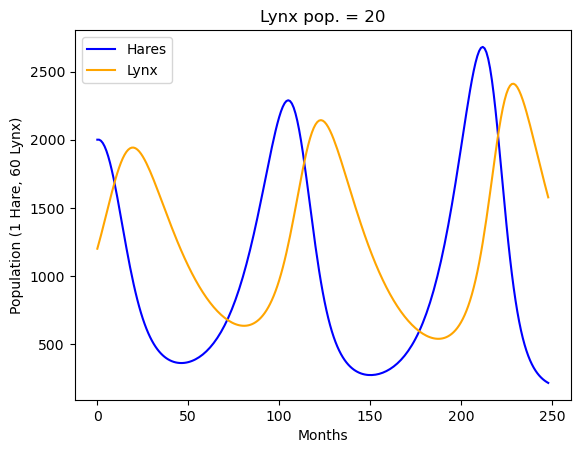

In [3]:
H_line, L_line= lynxHare(2000, 20, 250)
plt.plot(H_line, color='blue', label='Hares')
plt.plot(L_line, color='orange', label='Lynx')
plt.legend(['Hares', 'Lynx'])
plt.xlabel('Months')
plt.ylabel('Population (1 Hare, 60 Lynx)')
plt.title('Lynx pop. = 20') 

Text(0.5, 1.0, 'Lynx pop = 50')

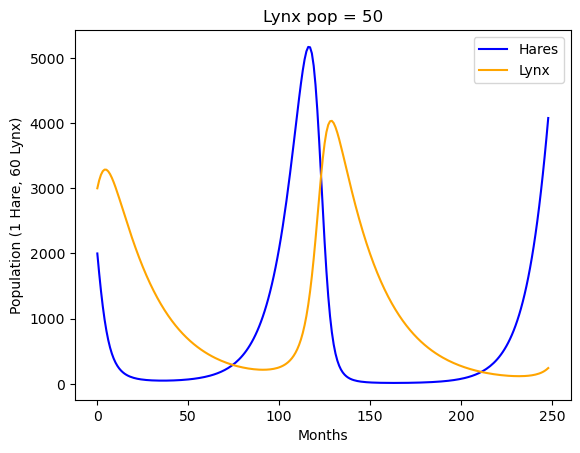

In [4]:
H_line, L_line= lynxHare(2000, 50, 250)
plt.plot(H_line, color='blue', label='Hares')
plt.plot(L_line, color='orange', label='Lynx')
plt.legend(['Hares', 'Lynx'])
plt.xlabel('Months')
plt.ylabel('Population (1 Hare, 60 Lynx)')
plt.title('Lynx pop = 50') 

**Activity One:**
Do all parts of the May Model, 4.1 question 6. 


**a)**
The function $D(x) = \frac{cx}{x+d}$ shows how the rate at which a fox eats rabbits depends on the number of rabbits available.
If we have a low number of rabbits, x is small, so the denominator is dominated by d, so the equation approximates to $D(x) \approx \frac{cx}{d}$ showing how the number of rabbits eaten per fox is roughly proportional to the rabbits available. Parameter d sets the scale for how quickly the relationship becomes saturated as number of rabbits (x) increases.

When x is large, x will dominate the denominator so the function $D(x) \approx c$ showing how when rabbits are abundant, any one fox can only eat so much food before reaching a saturation point, c. It doesn't matter how many more rabbits are around, the fox can't eat any more than a certain limit.

For "medium" values of x, the consumption rate increases as x increases; initially, more food leads to more consumption, but the rate gradually diminishes as factors like the fox's "stomach" limits slow consumption's increase.

Since d is in the denominator, a small value means D(x) hits saturation value c quickly. If d is large, rate of consumption increases slowly as number of rabbits (x) increases. 

the graph of D(x) would be a logistic growth, flattening out as the number of rabbits approaches the value c.

**b)**
$ax(1-\frac{x}{b})$ shows the logistic growth of rabbit population. 
a is the growth rate of rabbit population without any sort of limiting factors.
Here, b is the carrying capacity for the rabbit population. If x is small, rabbit growth looks more exponential, but as x gets closer to b, growth slows down.
$-\frac{cxy}{x+d}$  Here, cxy shows how number of encounters depend on both the number of rabbits and the number of foxes. x+d shows the saturation effect similar to D(x) discussed earlier.

$ey(1-\frac{y}{fx})$ shows the logistic growth of fox population. 
e is the growth rate of fox population without any limiting factors (abundant food available)
f is the carrying capacity, which is proportional to the rabbit population. More rabbits means fox population can grow larger, but with fewer rabbits, the fox carrying capacity is also lower

**c)** See Below

In [5]:
def MayModel(Tinit, Tfinal, R, F, a, b, c, d, e, f, steps):
    dT = (Tfinal - Tinit) / steps
    Tvals = [Tinit]
    Rvals = [R]
    Fvals = [F]
    
    for k in range(1, steps+1):
        Rp = a*R*(1-R/b) - c*R*F/(R+d)
        Fp = e*F*(1-F/(f*R))
        
        dR = Rp*dT
        dF = Fp*dT
        
        Tinit += dT
        R += dR
        F += dF
        
        Tvals.append(Tinit)
        Rvals.append(R)
        Fvals.append(F)
    
    plt.figure(figsize=(10, 6))
    
    plt.plot(Tvals, Rvals, label="Rabbits (Hectorabbits)", color='b', lw=2)
    plt.plot(Tvals, Fvals, label="Foxes", color='r', lw=2)
    
    plt.xlabel("Time (days)", fontsize=14)
    plt.ylabel("Population", fontsize=14)
    plt.title("May Model: Rabbit and Fox Population Dynamics", fontsize=16)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.show()

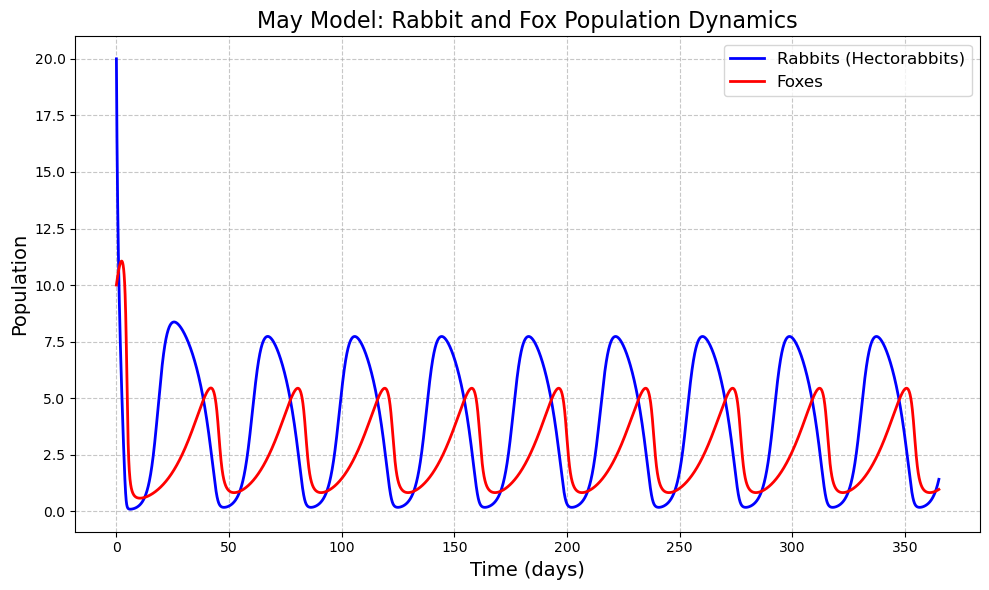

In [6]:
MayModel(0, 365, 2000/100, 10, 0.6, 10, 0.5, 1, 0.1, 2, 10000)

**c) continued**

It seems as though the rabbit population will plummet until the fox population also dwindles enough for the rabbit population to recover (albeit not back to its initial 2000), then the fox population can recover about half of its initial population, then the two populations begin to wax and wane, hitting a sort of cyclic pattern where their populations rise and fall depending on the other population: when fox populations are low, rabbit population increases, but then the fox population increases enough to cause the rabbit population to fall again, which means the foxes don't have enough food, so their population decreases, so rabbit population increases again. Rinse and repeat.

**d)** See Below

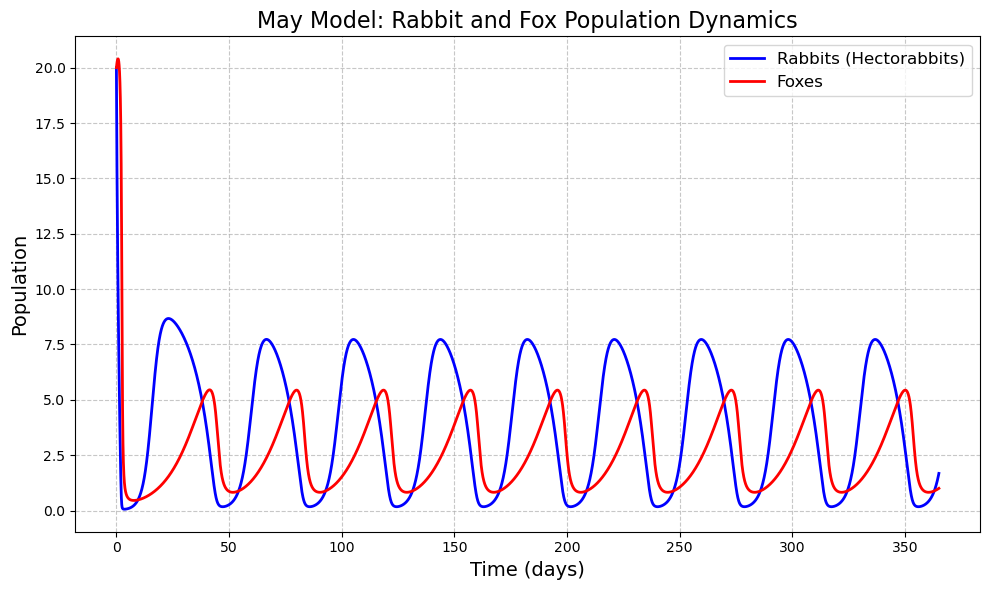

In [7]:
# 2000 rabbits and 20 foxes
MayModel(0, 365, 2000/100, 20, 0.6, 10, 0.5, 1, 0.1, 2, 10000)

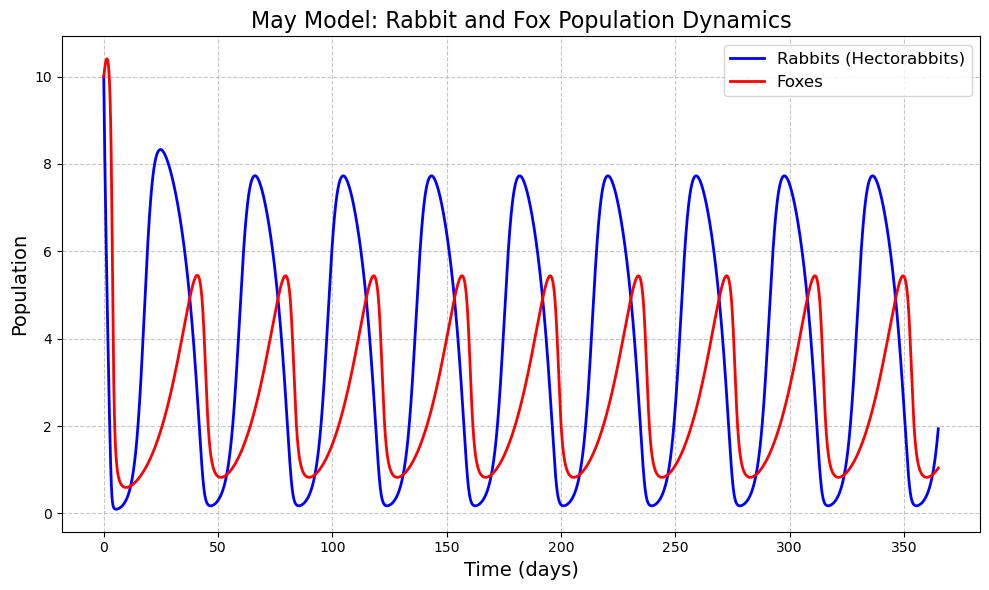

In [8]:
# 1000 rabbits and 10 foxes
MayModel(0, 365, 1000/100, 10, 0.6, 10, 0.5, 1, 0.1, 2, 10000)

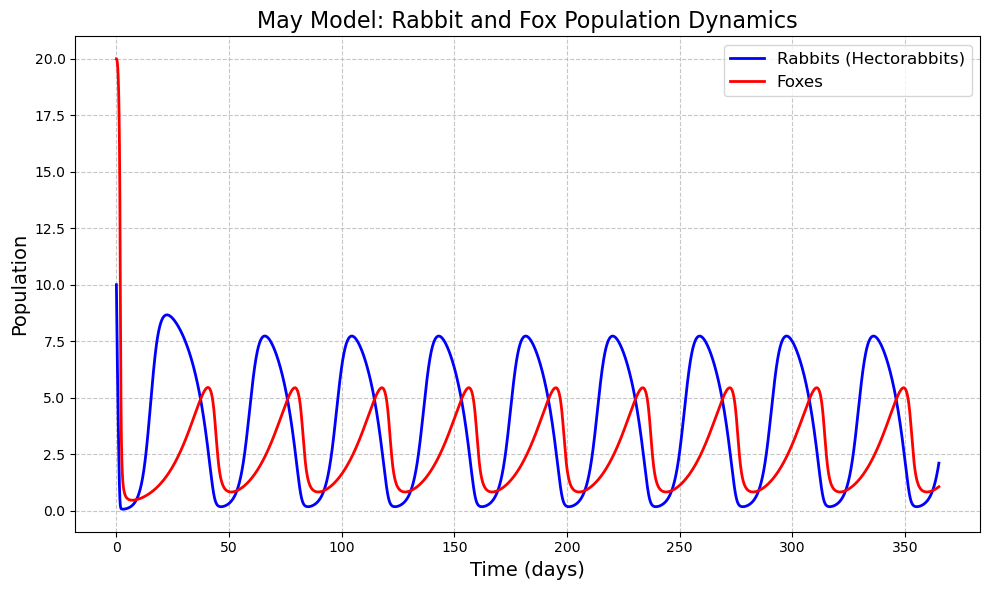

In [9]:
# 1000 rabbits and 20 foxes
MayModel(0, 365, 1000/100, 20, 0.6, 10, 0.5, 1, 0.1, 2, 10000)

**d) continued**
It seems like the initial numbers of rabbits and foxes don't change the final outcome. Similar to the Lotka-Volterra model, the numbers of rabbits and foxes seem to level out after just a couple cycles and then continue that wave pattern indefinitely.

**e)** See Below

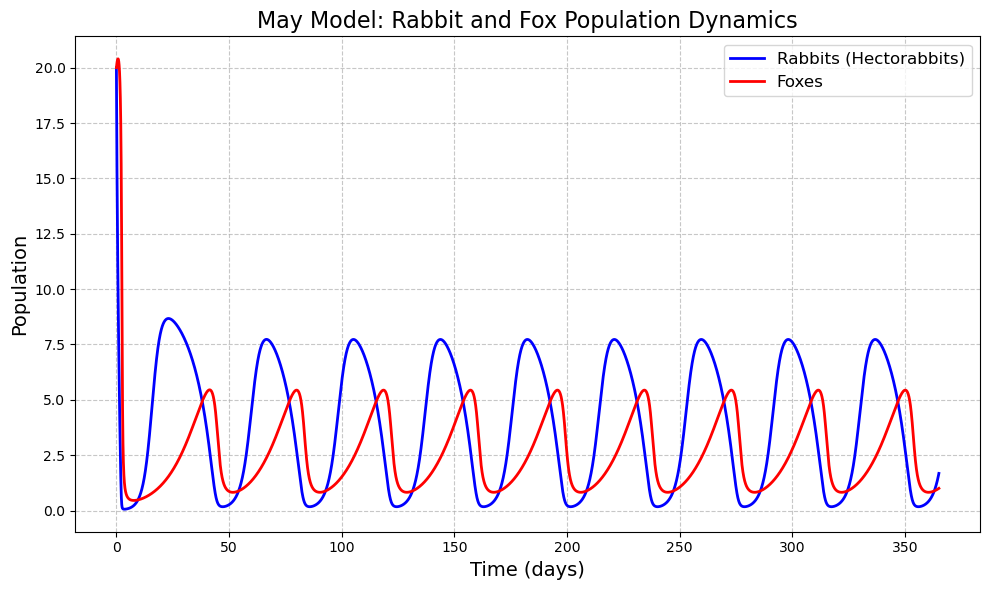

In [10]:
MayModel(0, 365, 2000/100, 20, 0.6, 10, 0.5, 1, 0.1, 2, 10000)

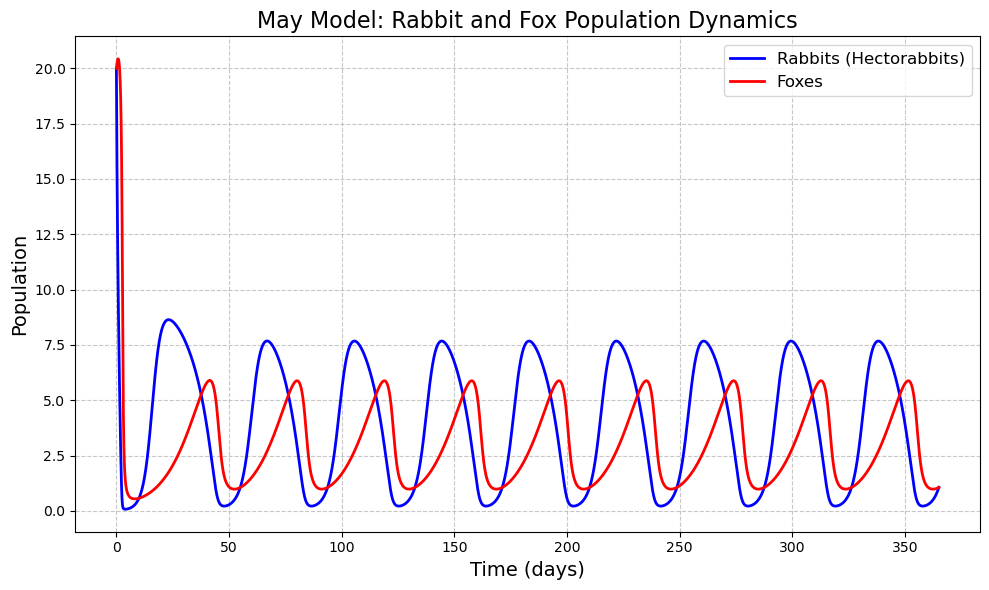

In [11]:
MayModel(0, 365, 2000/100, 20, 0.6, 10, 0.45, 1, 0.1, 2, 10000)

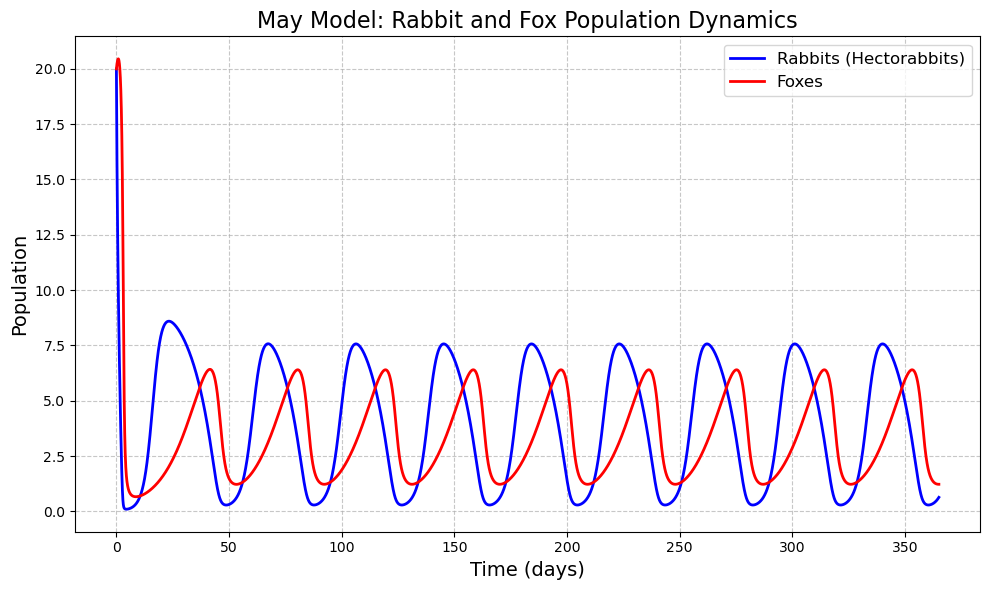

In [12]:
MayModel(0, 365, 2000/100, 20, 0.6, 10, 0.4, 1, 0.1, 2, 10000)

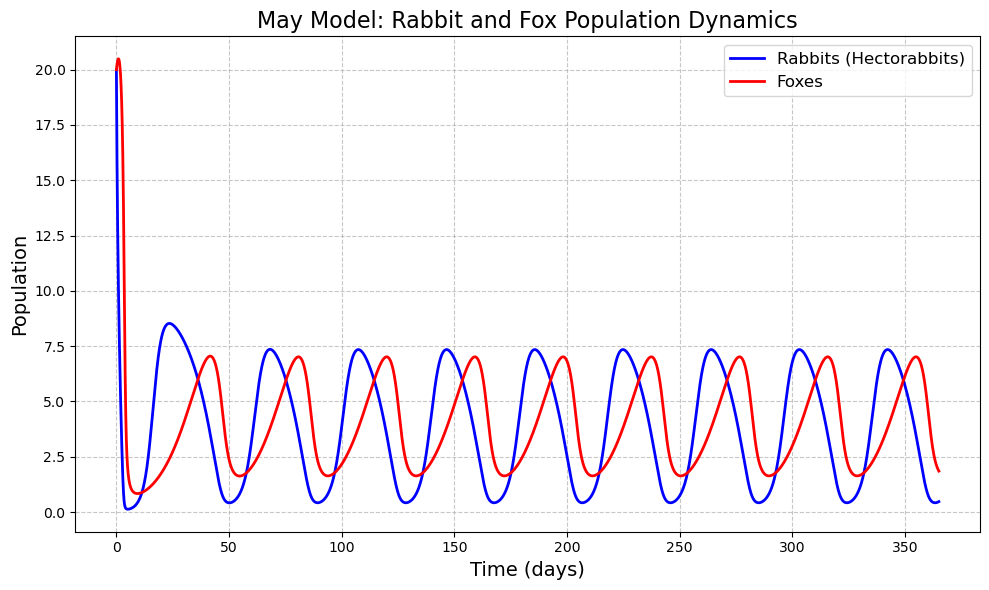

In [13]:
MayModel(0, 365, 2000/100, 20, 0.6, 10, 0.35, 1, 0.1, 2, 10000)

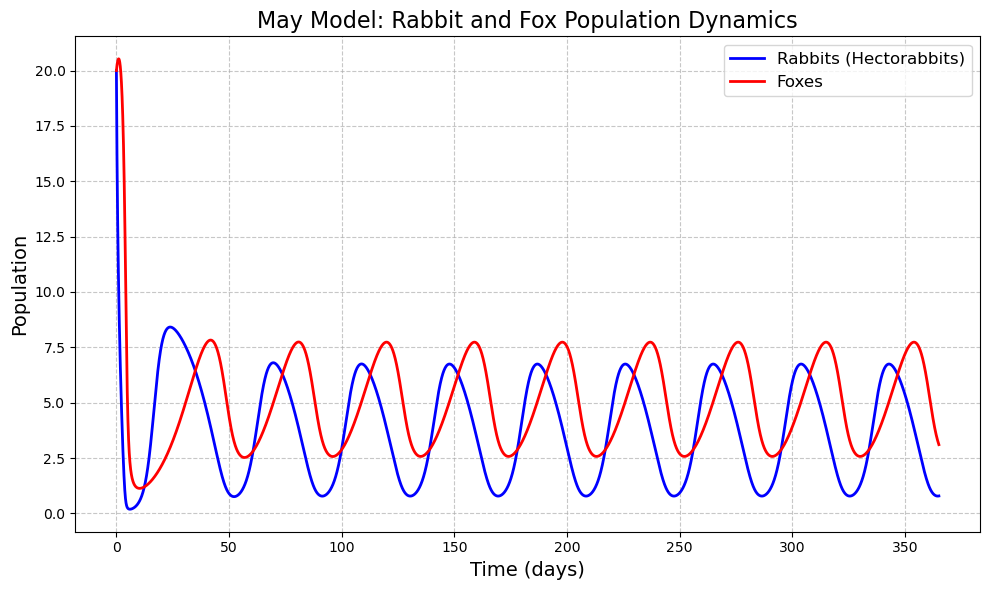

In [14]:
MayModel(0, 365, 2000/100, 20, 0.6, 10, 0.3, 1, 0.1, 2, 10000)

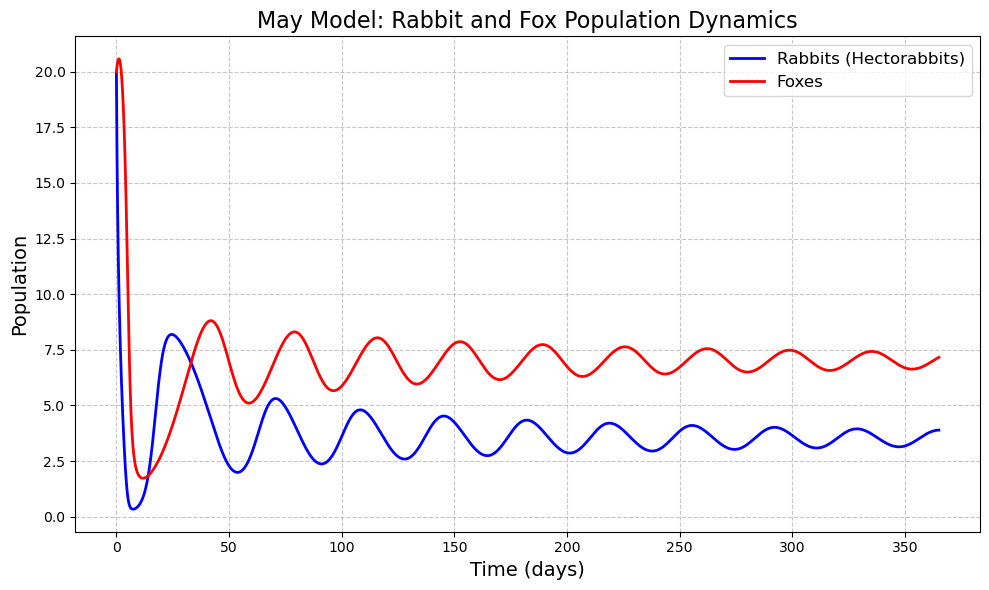

In [15]:
MayModel(0, 365, 2000/100, 20, 0.6, 10, 0.25, 1, 0.1, 2, 10000)

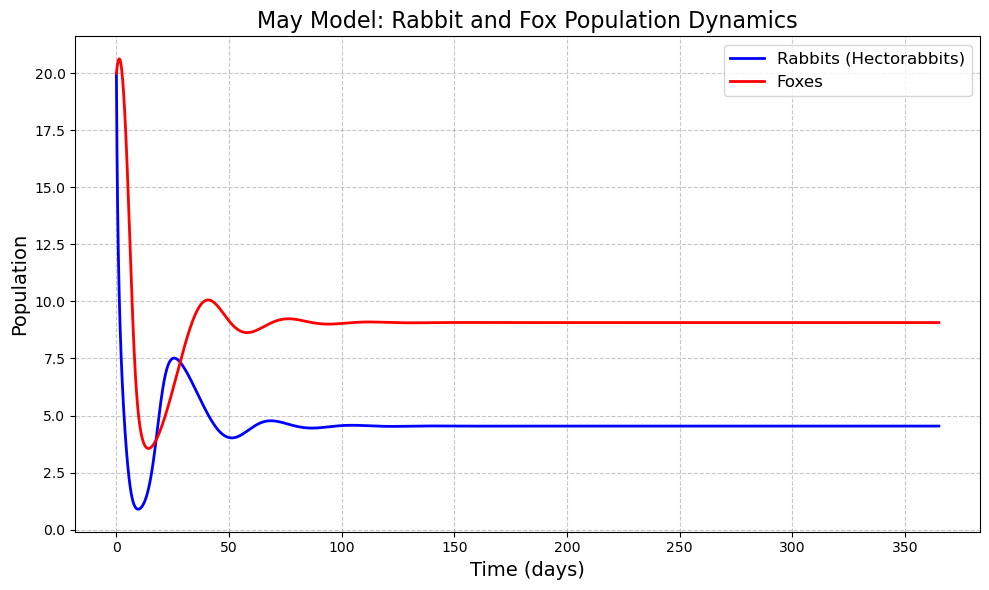

In [16]:
MayModel(0, 365, 2000/100, 20, 0.6, 10, 0.2, 1, 0.1, 2, 10000)

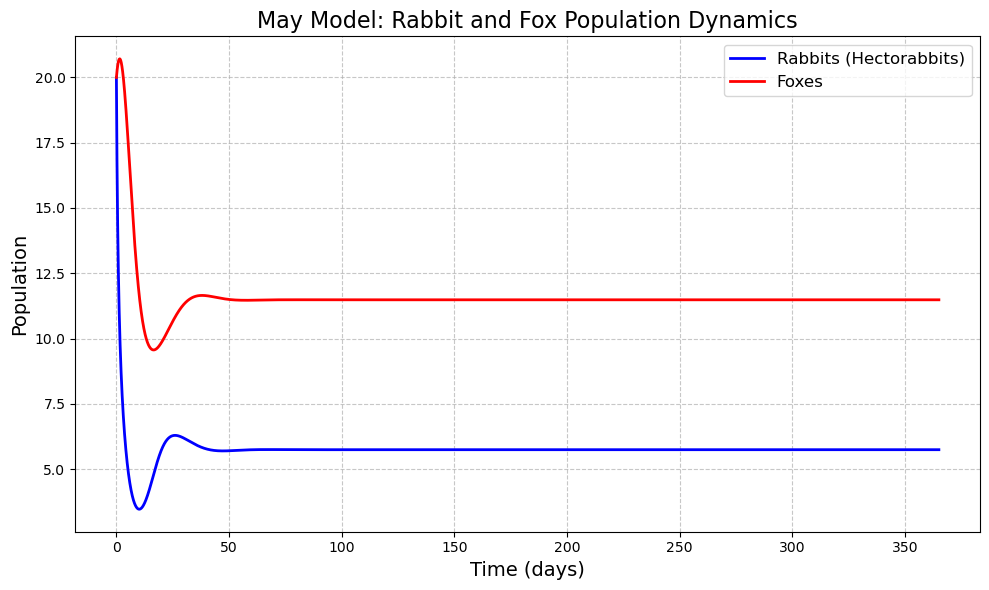

In [17]:
MayModel(0, 365, 2000/100, 20, 0.6, 10, 0.15, 1, 0.1, 2, 10000)

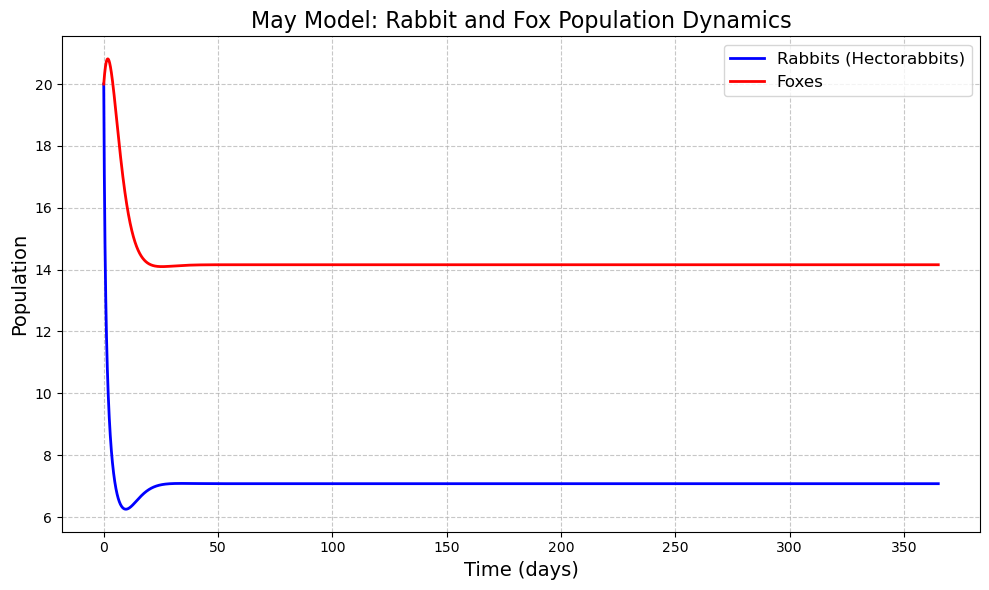

In [18]:
MayModel(0, 365, 2000/100, 20, 0.6, 10, 0.1, 1, 0.1, 2, 10000)

**e) continued**
Unless I'm misunderstanding Hopf bifurcation, it seems as though the system is stable at c<=2 and fluctuates with cyclic waves at c>=2.5. 

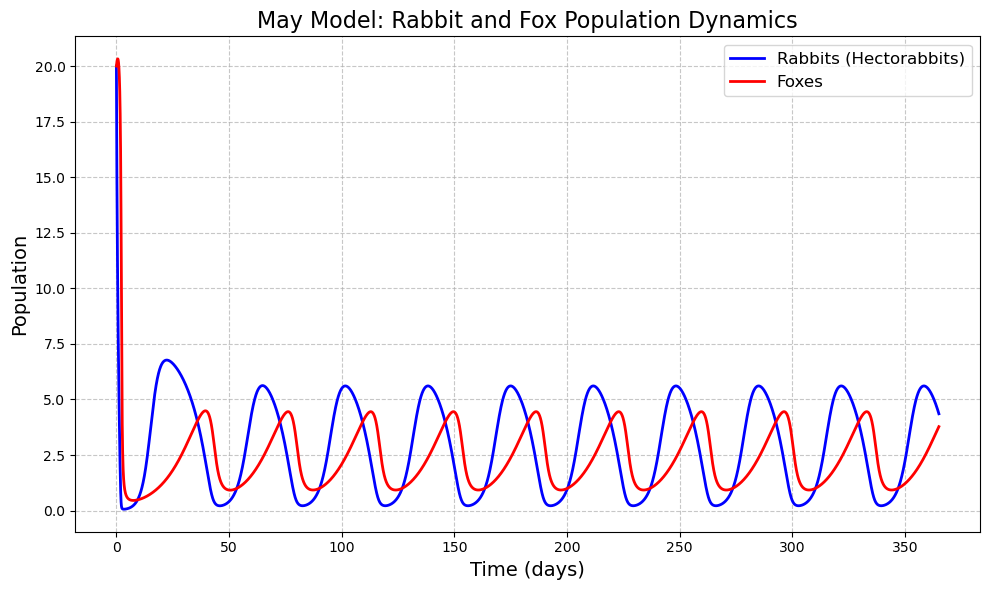

In [19]:
# even more e), trying out changes in different parameters
# first I'll change up b, the rabbit carrying capacity
MayModel(0, 365, 2000/100, 20, 0.6, 8, 0.5, 1, 0.1, 2, 10000)

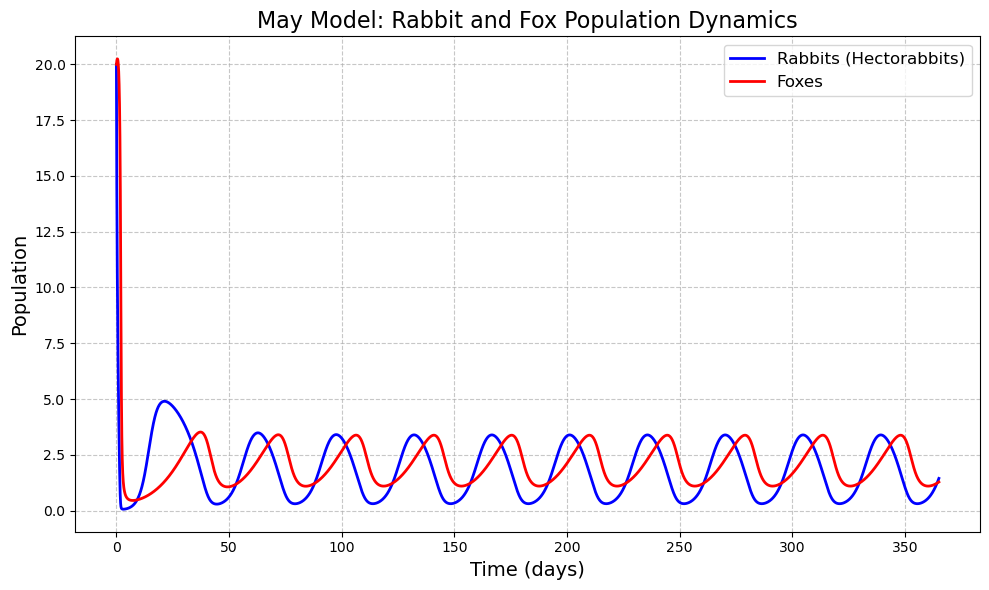

In [20]:
MayModel(0, 365, 2000/100, 20, 0.6, 6, 0.5, 1, 0.1, 2, 10000)

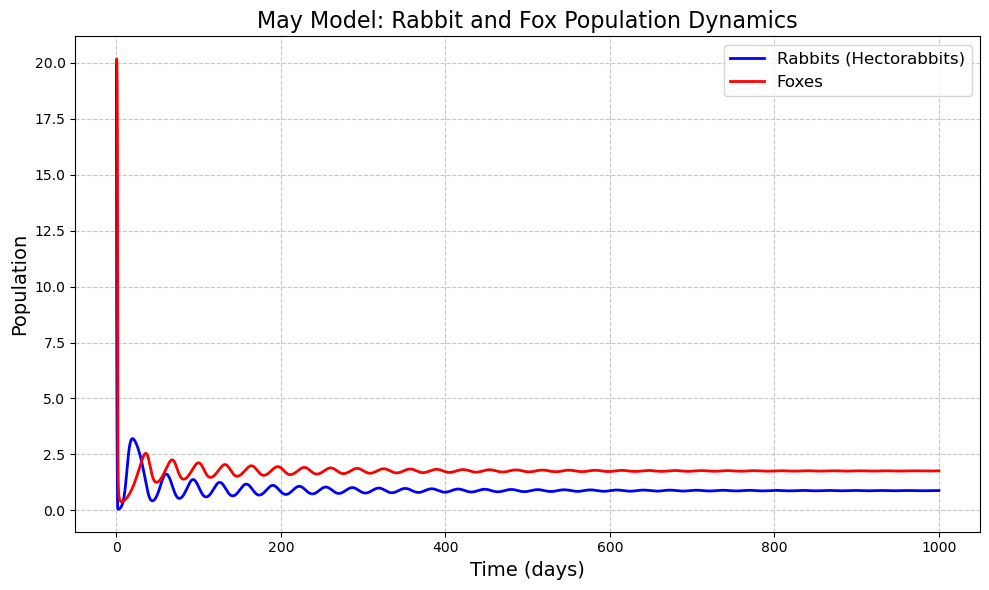

In [21]:
MayModel(0, 1000, 2000/100, 20, 0.6, 4, 0.5, 1, 0.1, 2, 10000)
#it seems like on a long enough time scale, 4 is the bifurcation value for b

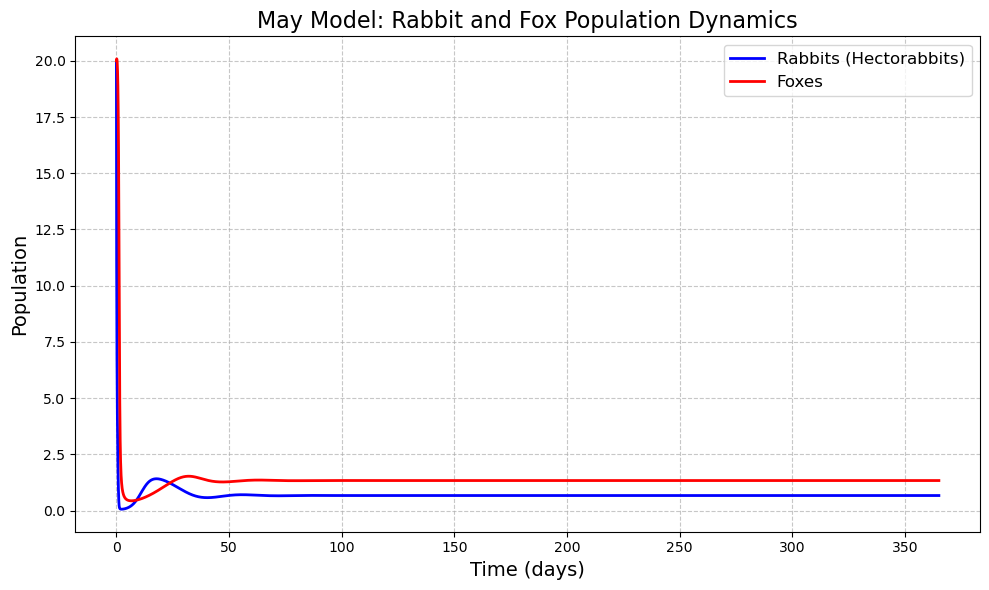

In [22]:
MayModel(0, 365, 2000/100, 20, 0.6, 2, 0.5, 1, 0.1, 2, 10000)

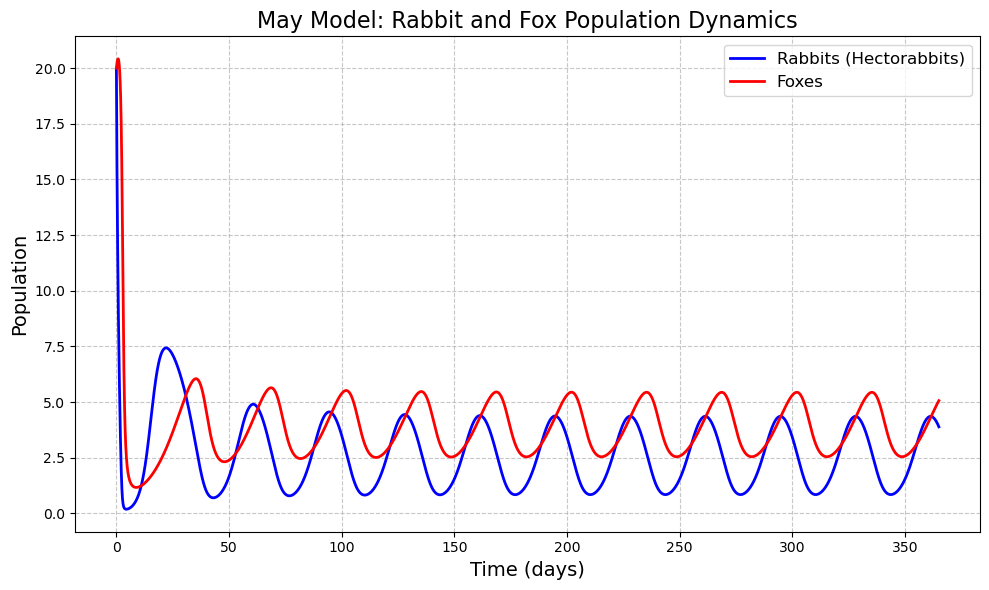

In [23]:
#next I'll try out changing up d, saturation value for rabbit consumption by foxes
MayModel(0, 365, 2000/100, 20, 0.6, 10, 0.5, 2, 0.1, 2, 10000)

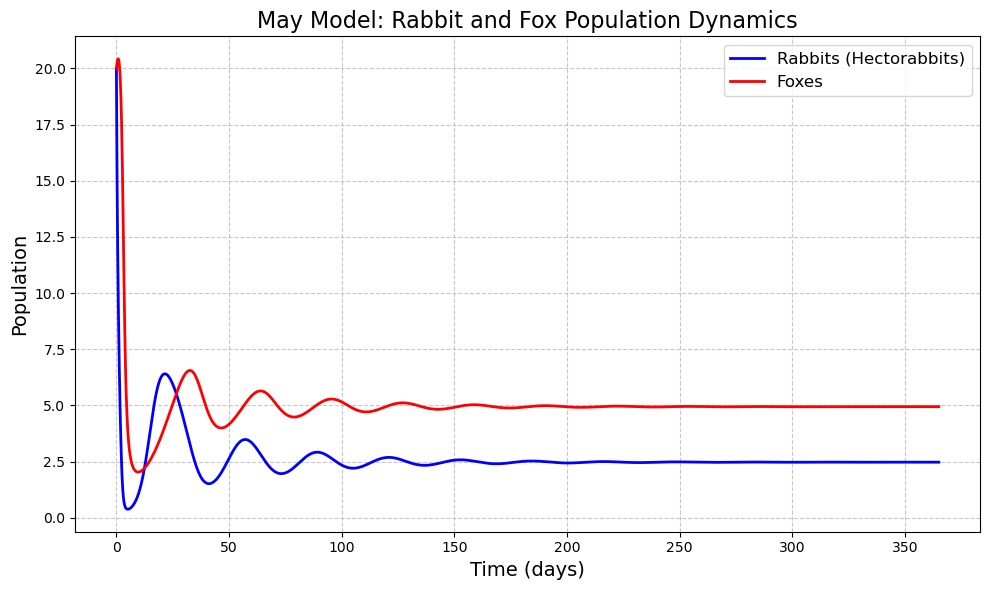

In [24]:
MayModel(0, 365, 2000/100, 20, 0.6, 10, 0.5, 3, 0.1, 2, 10000)
#seems like 3 is a winner for bifurcation value for the d parameter.

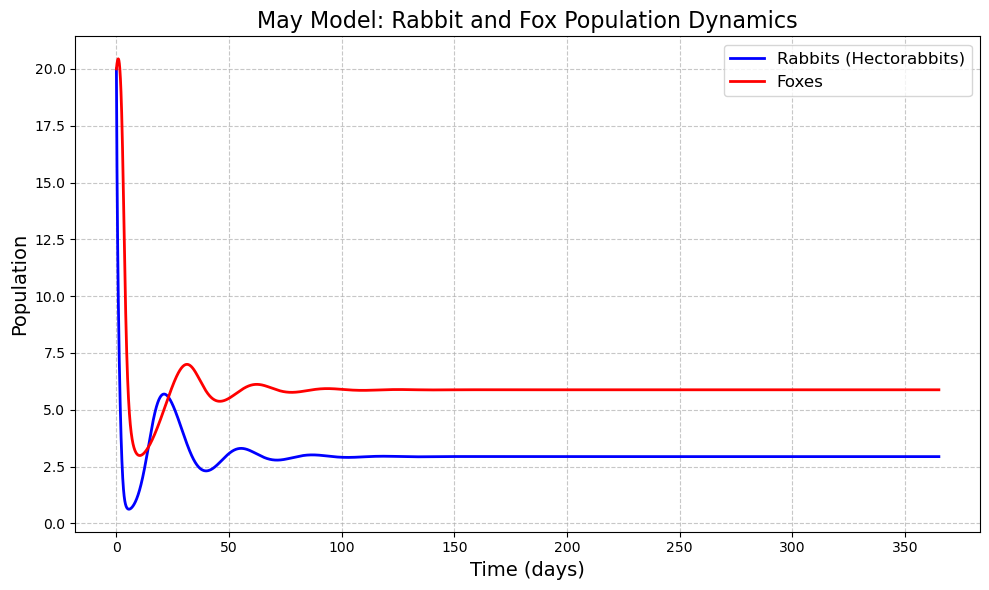

In [25]:
MayModel(0, 365, 2000/100, 20, 0.6, 10, 0.5, 4, 0.1, 2, 10000)

**Activity Two:**
Do all parts of 4.1  #8, #9, #10, #11 Fermentation. It's great to discover these equations on your own,however, please check with me and Piazza to make sure you've got them right.

### 4.1 Question 8

**a)**
$Y' = (0.2)(0.5)(1 - \frac{0.5}{10})$


In [26]:
#b)

def YeastModel(Tinit, Tfinal, Y, K, r, steps):
    dT = (Tfinal - Tinit) / steps
    Tvals = [Tinit]
    Yvals = [Y]
    
    half_capacity_time = None
    near_capacity_time = None
    
    for k in range(1, steps+1):
        Yp = r * Y * (1 - (Y / K))
        dY = Yp * dT
        
        Tinit += dT
        Y += dY
        
        Tvals.append(Tinit)
        Yvals.append(Y)
        
        if half_capacity_time is None and Y >= 0.5 * K:
            half_capacity_time = Tinit
            
        if near_capacity_time is None and Y >= 0.99 * K:
            near_capacity_time = Tinit
    
    plt.figure(figsize=(10, 6))
    
    plt.plot(Tvals, Yvals, label="Yeast Population", color='g', lw=2)
    
    if half_capacity_time:
        plt.axvline(x=half_capacity_time, color='b', linestyle='--', lw=1.5, label=f"50% Capacity (t ≈ {half_capacity_time:.1f})")
    
    if near_capacity_time:
        plt.axvline(x=near_capacity_time, color='r', linestyle='--', lw=1.5, label=f"99% Capacity (t ≈ {near_capacity_time:.1f})")
    
    plt.xlabel("Time (hours)", fontsize=14)
    plt.ylabel("Yeast Population (lbs)", fontsize=14)
    plt.title("Yeast Growth in a Vat of Grape Juice", fontsize=16)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.show()

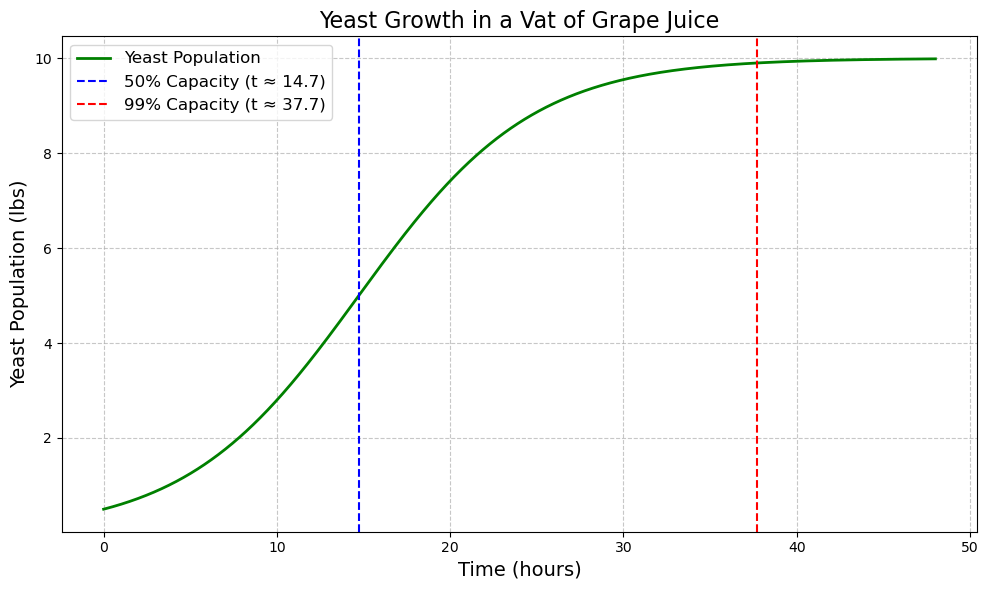

In [27]:
YeastModel(0, 48, 0.5, 10, 0.2, 10000)

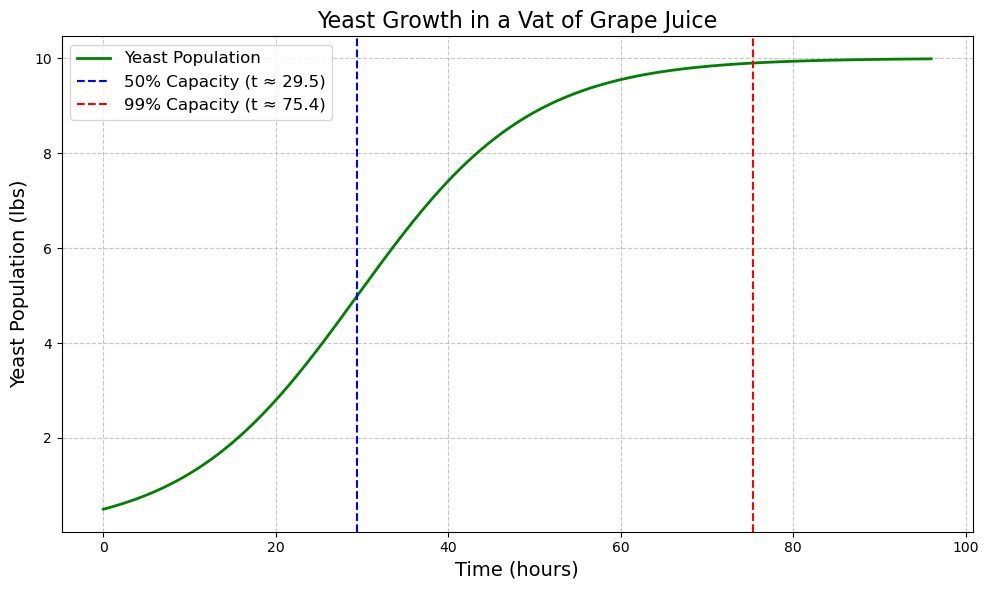

In [28]:
#c
YeastModel(0, 96, 0.5, 10, 0.1, 10000)
# compared to the first graph's numbers, these numbers are pretty much double.

### 4.1 Question 9

**a)**
$A' = 0.05*Y(t)$

**b)**
$Y' = (0.2)(Y)(1 - \frac{Y}{10}) - 0.1(Y)(A)$

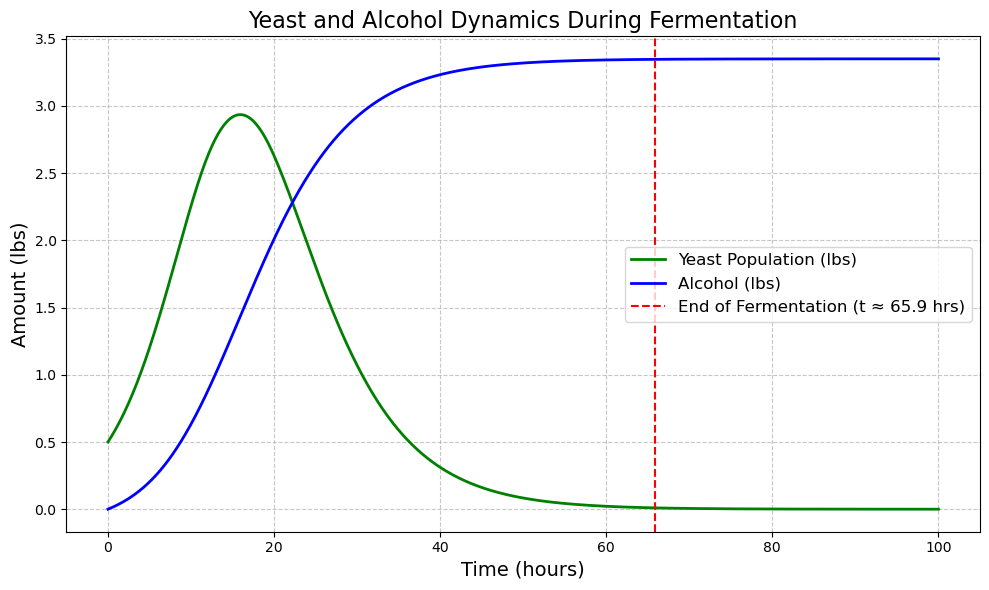

In [29]:
#c)
from scipy.integrate import solve_ivp

# differential equations
def yeast_alcohol_system(t, Y_A, r, K):
    Y, A = Y_A
    dYdt = r * Y * (1 - Y / K) - 0.1 * Y * A  
    dAdt = 0.05 * Y  
    return [dYdt, dAdt]

r = 0.2  # growth rate of yeast
K = 10   # carrying capacity of yeast
Y = 0.5  # initial yeast
A = 0    # initial alcohol
Tfinal = 100  # final time

# I found this handy new function called solve_ivp to solve a system of equations
sol = solve_ivp(yeast_alcohol_system, [0, Tfinal], [Y, A], args=(r, K), dense_output=True)

Tvals = np.linspace(0, Tfinal, 1000)
Yvals, Avals = sol.sol(Tvals)

end_time_index = np.where(Yvals <= 0.01)[0]

if end_time_index.size > 0:
    fermentation_end_time = Tvals[end_time_index[0]]
else:
    fermentation_end_time = Tfinal

plt.figure(figsize=(10, 6))
plt.plot(Tvals, Yvals, label="Yeast Population (lbs)", color='g', lw=2)
plt.plot(Tvals, Avals, label="Alcohol (lbs)", color='b', lw=2)

if end_time_index.size > 0:
    plt.axvline(x=fermentation_end_time, color='r', linestyle='--', lw=1.5, label=f"End of Fermentation (t ≈ {fermentation_end_time:.1f} hrs)")

plt.xlabel("Time (hours)", fontsize=14)
plt.ylabel("Amount (lbs)", fontsize=14)
plt.title("Yeast and Alcohol Dynamics During Fermentation", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### 4.1 Question 10

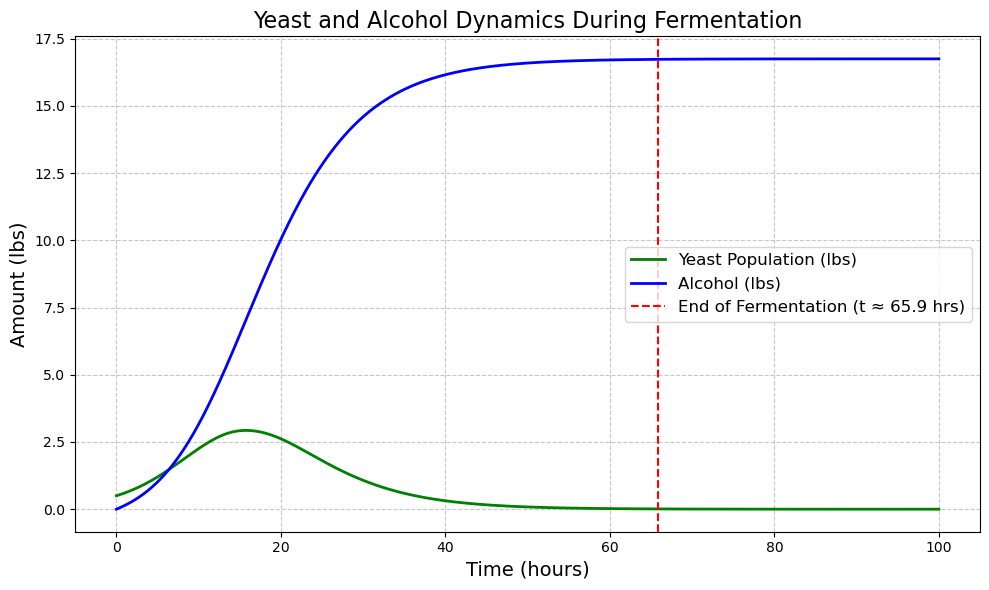

In [30]:
# differential equations
def yeast_alcohol_system2(t, Y_A, r, K):
    Y, A = Y_A
    dYdt = r * Y * (1 - Y / K) - 0.02 * Y * A  
    dAdt = 0.25 * Y  
    return [dYdt, dAdt]

r = 0.2  # growth rate of yeast
K = 10   # carrying capacity of yeast
Y = 0.5  # initial yeast
A = 0    # initial alcohol
Tfinal = 100  # final time

# I found this handy new function called solve_ivp to solve a system of equations
sol = solve_ivp(yeast_alcohol_system2, [0, Tfinal], [Y, A], args=(r, K), dense_output=True)

Tvals = np.linspace(0, Tfinal, 1000)
Yvals, Avals = sol.sol(Tvals)

end_time_index = np.where(Yvals <= 0.01)[0]

if end_time_index.size > 0:
    fermentation_end_time = Tvals[end_time_index[0]]
else:
    fermentation_end_time = Tfinal

plt.figure(figsize=(10, 6))
plt.plot(Tvals, Yvals, label="Yeast Population (lbs)", color='g', lw=2)
plt.plot(Tvals, Avals, label="Alcohol (lbs)", color='b', lw=2)

if end_time_index.size > 0:
    plt.axvline(x=fermentation_end_time, color='r', linestyle='--', lw=1.5, label=f"End of Fermentation (t ≈ {fermentation_end_time:.1f} hrs)")

plt.xlabel("Time (hours)", fontsize=14)
plt.ylabel("Amount (lbs)", fontsize=14)
plt.title("Yeast and Alcohol Dynamics During Fermentation", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

These changes have no effect on time it takes fermentation to end, but they drastically increase the amount of alcohol produced. 

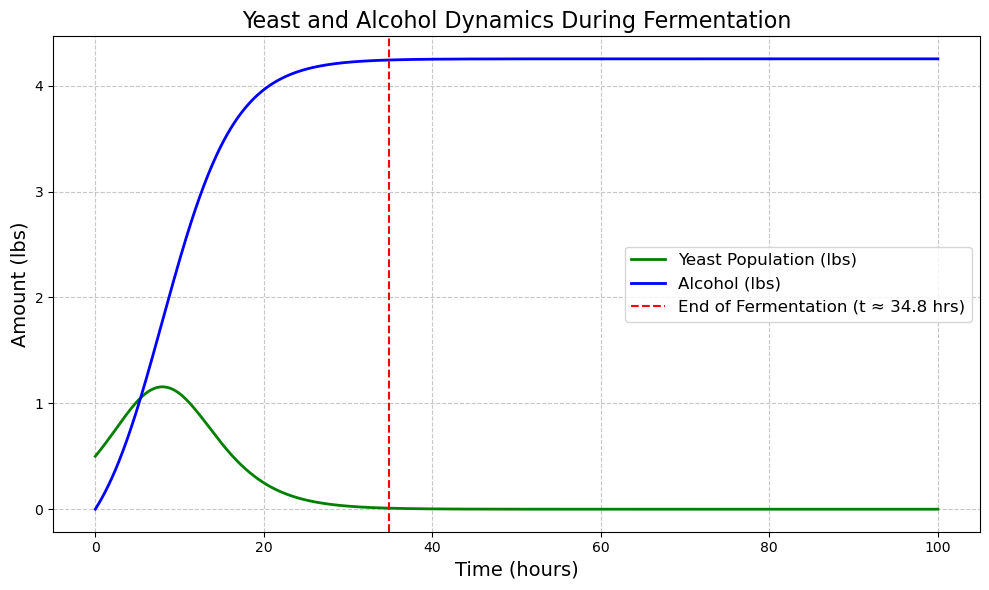

In [32]:
# differential equations
def yeast_alcohol_systemA(t, Y_A, r, K):
    Y, A = Y_A
    dYdt = r * Y * (1 - Y / K) - 0.1 * Y * A  
    dAdt = 0.25 * Y  
    return [dYdt, dAdt]

r = 0.2  # growth rate of yeast
K = 10   # carrying capacity of yeast
Y = 0.5  # initial yeast
A = 0    # initial alcohol
Tfinal = 100  # final time

# I found this handy new function called solve_ivp to solve a system of equations
sol = solve_ivp(yeast_alcohol_systemA, [0, Tfinal], [Y, A], args=(r, K), dense_output=True)

Tvals = np.linspace(0, Tfinal, 1000)
Yvals, Avals = sol.sol(Tvals)

end_time_index = np.where(Yvals <= 0.01)[0]

if end_time_index.size > 0:
    fermentation_end_time = Tvals[end_time_index[0]]
else:
    fermentation_end_time = Tfinal

plt.figure(figsize=(10, 6))
plt.plot(Tvals, Yvals, label="Yeast Population (lbs)", color='g', lw=2)
plt.plot(Tvals, Avals, label="Alcohol (lbs)", color='b', lw=2)

if end_time_index.size > 0:
    plt.axvline(x=fermentation_end_time, color='r', linestyle='--', lw=1.5, label=f"End of Fermentation (t ≈ {fermentation_end_time:.1f} hrs)")

plt.xlabel("Time (hours)", fontsize=14)
plt.ylabel("Amount (lbs)", fontsize=14)
plt.title("Yeast and Alcohol Dynamics During Fermentation", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

If only the rate of Alcohol is changed, not as much yeast grows, not as much total alcohol is made, and the fermentation time is much shorter: 34.8 hrs vs 65.9 hrs.

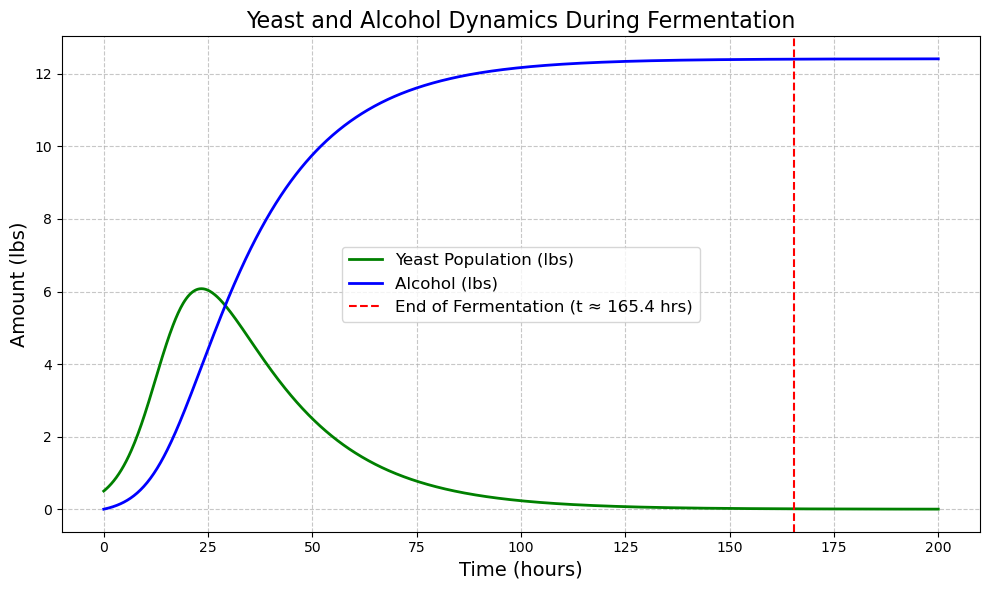

In [35]:
# differential equations
def yeast_alcohol_systemT(t, Y_A, r, K):
    Y, A = Y_A
    dYdt = r * Y * (1 - Y / K) - 0.02 * Y * A  
    dAdt = 0.05 * Y  
    return [dYdt, dAdt]

r = 0.2  # growth rate of yeast
K = 10   # carrying capacity of yeast
Y = 0.5  # initial yeast
A = 0    # initial alcohol
Tfinal = 200  # final time

# I found this handy new function called solve_ivp to solve a system of equations
sol = solve_ivp(yeast_alcohol_systemT, [0, Tfinal], [Y, A], args=(r, K), dense_output=True)

Tvals = np.linspace(0, Tfinal, 1000)
Yvals, Avals = sol.sol(Tvals)

end_time_index = np.where(Yvals <= 0.01)[0]

if end_time_index.size > 0:
    fermentation_end_time = Tvals[end_time_index[0]]
else:
    fermentation_end_time = Tfinal

plt.figure(figsize=(10, 6))
plt.plot(Tvals, Yvals, label="Yeast Population (lbs)", color='g', lw=2)
plt.plot(Tvals, Avals, label="Alcohol (lbs)", color='b', lw=2)

if end_time_index.size > 0:
    plt.axvline(x=fermentation_end_time, color='r', linestyle='--', lw=1.5, label=f"End of Fermentation (t ≈ {fermentation_end_time:.1f} hrs)")

plt.xlabel("Time (hours)", fontsize=14)
plt.ylabel("Amount (lbs)", fontsize=14)
plt.title("Yeast and Alcohol Dynamics During Fermentation", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

If only the toxicity is changed, far more yeast grows (6 lbs vs 1.2 lbs or 3 lbs), not as much total alcohol is made (12.5 lbs vs 17 lbs), and the fermentation time is much longer: 165.4 hrs vs 34.8 hrs or 65.9 hrs.

### 4.1 Question 11

**a)**
S' = -0.15 * Y(t)

**b)**
Since carrying capacity is 0.4 * S pounds of yeast:  

10 = 0.4 * S ; S = $\frac{10}{0.4}$ ; S = 25 lbs of sugar

1 = 0.4 * S ; S = $\frac{1}{0.4} ; S = 2.5 lbs of sugar

Y' = 0.2Y(1 - $\frac{Y}{0.4S}$) - 0.1YA

In [37]:
# I'm using Nandini's equation from Piazza, with minor adjustments

def RF_PLOT(yeast, alcohol, sugar, t_final):
    
    #initial values
    t_initial = 0
    t = t_initial
    Y = yeast
    A = alcohol
    S = sugar

    Y_graph = []
    A_graph = []
    S_graph = []
    
    t_vals = np.arange(0, t_final, 0.001)
    delta_t = 0.001
    
    
    for k in t_vals:

        Y_graph.append(Y)
        A_graph.append(A)
        S_graph.append(S)
        
        #equations representing growth rate of yeast, alcohol, and sugar
        Yprime = (0.2 * Y) - ((0.2 / (0.4 * S)) * Y) - (0.1 * Y * A)
        Aprime = 0.05 * Y
        Sprime = -0.15 * Y
       
        delta_Y = Yprime * delta_t
        delta_A = Aprime * delta_t
        delta_S = Sprime * delta_t
        
        Y = Y + delta_Y
        A = A + delta_A
        S = S + delta_S
        
    
    plt.plot(t_vals, Y_graph, label = "Yeast")
    plt.plot(t_vals, A_graph, label = "Alcohol")
    plt.plot(t_vals, S_graph, label = "Sugar")
    
    plt.xlabel('Time')
    plt.ylabel('Growth')
    plt.title('Population Growth')
    plt.legend()
    plt.grid(True)
    
    
    plt.show()

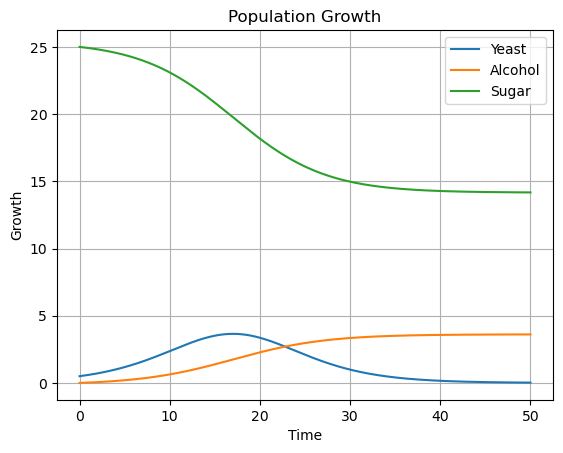

In [40]:
RF_PLOT(0.5, 0, 25, 50)

Only about 11 lbs of the sugar was consumed by the yeast. All the yeast disappears, or at least gets down to around or under 0.01 lb. It takes close to 50 hours before the yeast has disappeared. We still have about 14 lbs of sugar left at that point with about 3.5-4 lbs of alcohol produced.

**Activity Three:**
Choose any of the models from the book to expand upon and develop. This does not have to be super complex, please scale it to the time you have available.
+ The simple Lotka-Volterra model from #7 is easy to expand to a complex ecosystem with MANY equations (mice, foxes, bears, aliens, and can accomodate a Zombie Apocolypse)
+ Expand SIR, add complexities with immunity, other diseases (try Chicken Pox and Shingles together),add deaths, more variables, or compare various epidemic responses.
+ Check out the examples in 4.1 #12-#14(Newton's Cooling, can you see applications to crime scene investigations?)
+ Check out 4.1 #19-#24 from more ideas
+ If you did this activity in Linear Algebra and/or want a challenge, look up research papers about modeling with differential equations and try to reproduce the model - this could be a start for a final project.

### Activity 3:
The simple Lotka-Volterra model is easy to expand to a complex ecosystem with MANY equations (mice, foxes, bears, aliens, and can accommodate a Zombie Apocalypse):

We now introduce several new species:

+ Mice (M): Prey for both foxes and bears.
+ Foxes (F): Predators of mice and potentially prey for bears.
+ Bears (B): Apex predators that prey on both mice and foxes.
+ Aliens (A): Top-tier predators that prey on bears but avoid zombies.
+ Zombies (Z): Super-predators that prey on every species and don't die naturally.

Here are some differential equations to explain the different interactions with our new species added in:
#### Mice: grow naturally, prey for foxes and bears
$M' = r_{M}M - p_{MF}MF - p_{MB}MB$
+ r_{M} = growth rate of mice
+ p_{MF} = predation rate of mice by foxes
+ p_{MB} = predation rate of mice by bears

#### Foxes: grow by consuming mice, prey for bears and zombies
$F' = r_{F}MF - d_{F}F - p_{FB}FB - p_{FZ}FZ$
+ r_{F} = growth rate of foxes (based on consumption of mice)
+ d_{F} = natural death of foxes
+ p_{FB} = predation rate of foxes by bears
+ p_{FZ} = predation rate of foxes by zombies

#### Bears: grow by consuming mice and foxes, prey for aliens and zombies
$B' = r_{B}(MB+FB) - d_{B}B - p_{BA}BA - p_{BZ}BZ$
+ r_{B} = growth rate of bears (based on consumption of mice and foxes)
+ d_{B} = natural death of bears
+ p_{BA} = predation rate of bears by aliens
+ p_{BZ} = predation rate of bears by zombies

#### Aliens: picky eaters, prefer only bear flesh, easily evade/destroy zombies
$A' = r_{A}AB - d_{A}A$
+ r_{A} = growth rate of aliens (based on consumption of bears)
+ d_{A} = natural death of aliens

#### Zombies: eat any and all other species, no natural death
$Z' = p_{ZM}ZM + p_{ZF}ZF +p_{ZB}ZB + p_{ZA}ZA$
+ p_{ZM} = predation rate of mice by zombies
+ p_{ZF} = predation rate of foxes by zombies
+ p_{ZB} = predation rate of bears by zombies
+ p_{ZA} = predation rate of aliens by zombies



In [62]:
def ecosystem(mice, foxes, bears, aliens, zombies, t_final=2):
    # defining system of differential equations
    def equations(t, populations):
        M, F, B, A, Z = populations
        
        # parameters (growth rates, death rates, predation rates)
        rM = 1.5    
        rF = 0.5    
        rB = 0.3    
        rA = 0.01    
        
        dF = 0.005   
        dB = 0.002   
        dA = 0.008   
        
        pMF = 0.008  
        pMB = 0.005  
        pFB = 0.004  
        pBA = 0.001  
        
        pZM = 0.003  
        pZF = 0.002  
        pZB = 0.001  
        pZA = 0.001  

        # differential equations
        dMdt = rM * M - pMF * M * F - pMB * M * B - pZM * M * Z
        dFdt = rF * M * F - dF * F - pFB * F * B - pZF * F * Z
        dBdt = rB * (M * B + F * B) - dB * B - pBA * B * A - pZB * B * Z
        dAdt = rA * B * A - dA * A - pZA * Z * A
        dZdt = pZM * M * Z + pZF * F * Z + pZB * Z * B + pZA * Z * A
        
        return [dMdt, dFdt, dBdt, dAdt, dZdt]
    
    # total time span
    t_span = [0, t_final]
    t_eval = np.linspace(t_span[0], t_span[1], 1000)
    
    # initializing populations
    populations = [mice, foxes, bears, aliens, zombies]
    
    # solving system of ODEs
    sol = solve_ivp(equations, t_span, populations, t_eval=t_eval, method='RK45')
    
    # plotting results
    plt.figure(figsize=(10, 6))
    
    plt.plot(sol.t, sol.y[0], label='Mice', color='gray', lw=2)
    plt.plot(sol.t, sol.y[1], label='Foxes', color='orange', lw=2)
    plt.plot(sol.t, sol.y[2], label='Bears', color='brown', lw=2)
    plt.plot(sol.t, sol.y[3], label='Aliens', color='purple', lw=2)
    plt.plot(sol.t, sol.y[4], label='Zombies', color='green', lw=2)
    
    plt.title('Ecosystem Dynamics: Mice, Foxes, Bears, Aliens, Zombies', fontsize=16)
    plt.xlabel('Time (days)', fontsize=14)
    plt.ylabel('Population', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.show()

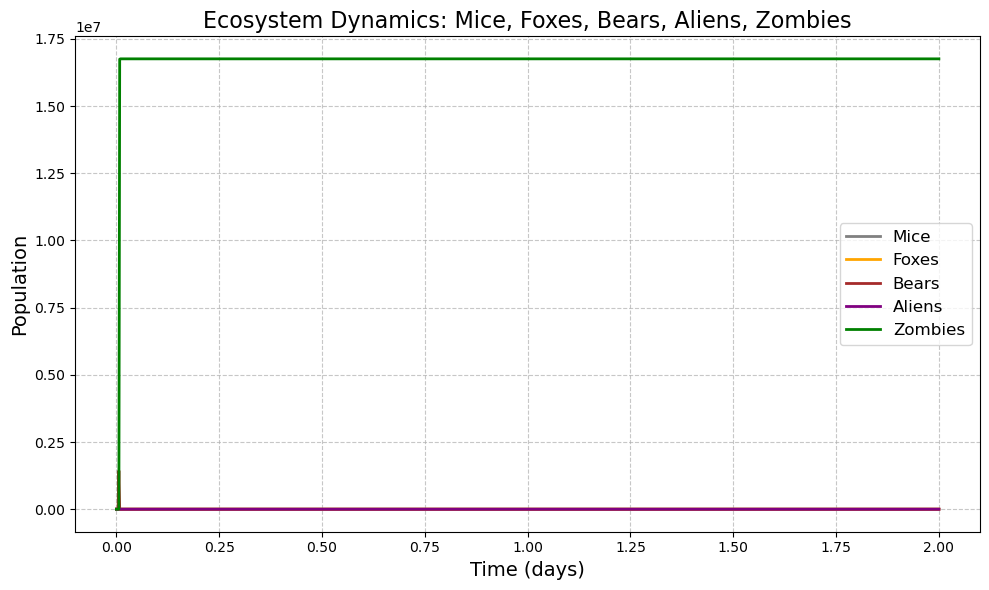

In [63]:
ecosystem(2000, 100, 20, 2, 1)

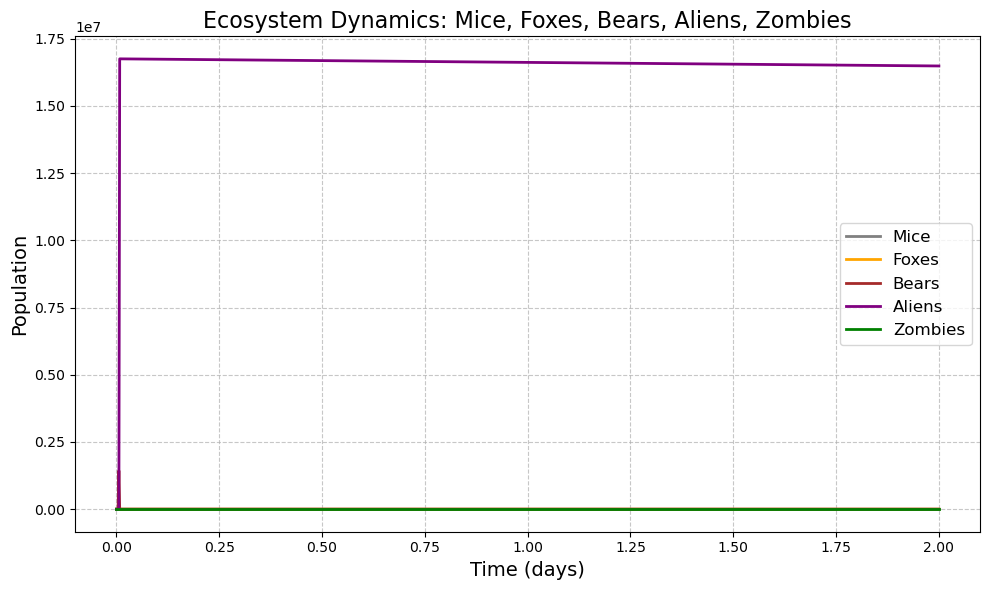

In [64]:
ecosystem(2000, 100, 20, 2, 0)

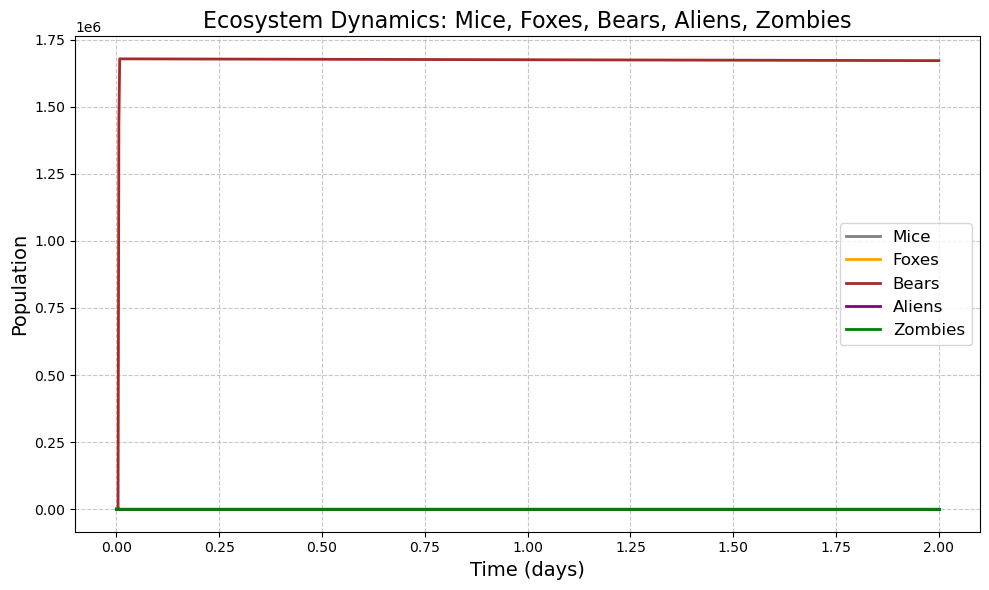

In [65]:
ecosystem(2000, 100, 20, 0, 0)

I'm not really sure what's causing these graphs to immediately max out for whatever predator is the apex of the input parameters. First zombies max out, then aliens max out, then bears max out.
Would love some feedback on this to better understand why it's giving weird graphs.